<a href="https://colab.research.google.com/github/Shibsankar20122001/Credit-Card-Fraud-Detection/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
!pip install kaggle


In [3]:
import os
os.environ['KAGGLE_USERNAME']='shibsankarmaity'
os.environ['KAGGLE_KEY']='e87139e845dfb5a2f7a6c4a56d8b5307'


In [4]:
!kaggle datasets download -d mlg-ulb/creditcardfraud


 80% 53.0M/66.0M [00:00<00:00, 198MB/s]
100% 66.0M/66.0M [00:00<00:00, 192MB/s]


In [5]:
#unzip file
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [6]:
data=pd.read_csv('//content//creditcard.csv')

In [7]:
print(data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [8]:
pd.options.display.max_columns = None

In [9]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
data.shape

(284807, 31)

In [12]:
print("Number of Rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of Rows 284807
Number of columns 31


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
# check numm values in the dataset
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
# cleaning the null data
data_cleaned = data.dropna()

In [16]:
data_cleaned.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()
data_cleaned['Amount'] = sc.fit_transform(pd.DataFrame(data_cleaned['Amount']))

In [20]:
data_cleaned.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [21]:
data_cleaned.shape

(284807, 31)

In [22]:
data.duplicated().any()

True

In [23]:
#drop duplicate value
data_cleaned=data_cleaned.drop_duplicates()

In [24]:
data_cleaned.shape

(283726, 31)

In [25]:
#Not Handling Imbalanced
data=data_cleaned

In [26]:
data.shape

(283726, 31)

In [27]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [28]:
import seaborn as sns

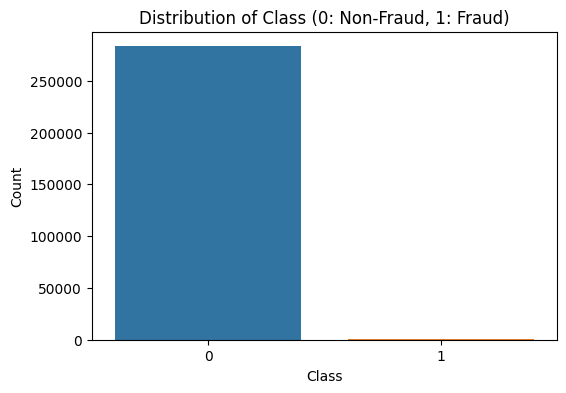

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your loaded DataFrame
plt.figure(figsize=(6, 4))  # Set the figure size (width, height)
sns.countplot(x='Class', data=data)
plt.title("Distribution of Class (0: Non-Fraud, 1: Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [30]:
#store feature matrix in X and response(target) in vector y
X = data.drop('Class',axis=1)
y = data['Class']

In [31]:
#Splitting the dataset into the training set and the test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

In [32]:
#handling imbalanced
#undersampling
#oversampling

In [33]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred1 = log.predict(X_test)


In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred1)

0.9990307686885419

In [37]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [38]:
precision_score(y_test,y_pred1)

0.7692307692307693

In [39]:
recall_score(y_test,y_pred1)

0.5555555555555556

In [40]:
f1_score(y_test,y_pred1)

0.6451612903225806

In [41]:
#Undersampling

In [42]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [43]:
normal.shape

(283253, 31)

In [44]:
fraud.shape

(473, 31)

In [45]:
normal_sample=normal.sample(n=473)

In [46]:
normal_sample.shape

(473, 31)

In [47]:
#concat
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [48]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [49]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119485.0,0.040198,0.599310,0.085424,-1.275197,0.959184,0.063595,0.736279,0.104303,-0.224984,-0.432519,-0.443464,-0.266622,-0.805421,0.576029,-0.164551,0.998992,-1.362255,0.332024,0.552461,-0.162176,-0.349863,-1.155967,0.196915,-1.524394,-1.421640,-0.075640,0.158887,0.211916,-0.299335,0
1,41772.0,0.757129,-1.767213,0.879087,-0.296510,-1.666527,0.542975,-0.993086,0.301667,-0.076419,0.402330,1.020477,0.254978,-0.555509,-0.523616,-1.035577,0.703262,0.757017,-1.375662,0.767986,0.517617,0.231132,0.228870,-0.196765,0.058341,0.167790,-0.257875,0.014383,0.055424,0.716419,0
2,140266.0,1.942948,-0.139152,-1.265837,0.809661,-0.309690,-1.186193,-0.101422,-0.167434,0.938854,-0.389512,-0.709223,-0.607422,-1.385307,-0.844999,0.516137,0.537247,0.620380,0.307181,-0.319122,-0.197284,-0.102641,-0.269539,0.192685,-0.074932,-0.270597,0.218175,-0.039497,-0.022187,-0.181312,0
3,16003.0,-1.578896,1.921283,2.014418,3.177392,-0.249590,2.006822,-2.050794,-5.507563,0.505128,-0.098818,0.174380,-2.426020,1.150221,1.443578,-0.283966,-0.476508,1.319599,0.075809,0.061333,1.305746,-2.528102,1.548477,0.271509,0.023591,-0.660898,0.195564,-0.595176,-0.218600,-0.292538,0
4,66633.0,1.068276,-0.111540,1.079594,1.040111,-0.595621,0.568371,-0.731633,0.368450,0.319535,0.128521,1.094403,0.625358,-0.289251,0.238482,1.030556,0.707018,-0.778667,0.567832,-0.663570,-0.109127,0.185498,0.506816,-0.050766,-0.316216,0.261427,-0.315138,0.069208,0.027007,-0.239004,0


In [50]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

In [52]:
#Logistic regression


In [53]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_pred1 = log.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test,y_pred1)

0.9421052631578948

In [57]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [58]:
precision_score(y_test,y_pred1)

0.9789473684210527

In [59]:
recall_score(y_test,y_pred1)

0.9117647058823529

In [60]:
f1_score(y_test,y_pred1)

0.9441624365482234

In [61]:
#Decision tree classifier


In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
y_pred2 = dt.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred2)

0.868421052631579

In [65]:
precision_score(y_test,y_pred2)

0.8532110091743119

In [66]:
recall_score(y_test,y_pred2)

0.9117647058823529

In [67]:
f1_score(y_test,y_pred2)

0.8815165876777251

In [68]:
# Random forest


In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
y_pred3 = rf.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred3)

0.9263157894736842

In [72]:
precision_score(y_test,y_pred3)

0.9583333333333334

In [73]:
recall_score(y_test,y_pred3)

0.9019607843137255

In [74]:
f1_score(y_test,y_pred3)

0.9292929292929293

In [75]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})
final_data

,Models,ACC
0,LR,94.210526
1,DT,86.842105
2,RF,92.631579


In [76]:
final_data

,Models,ACC
0,LR,94.210526
1,DT,86.842105
2,RF,92.631579


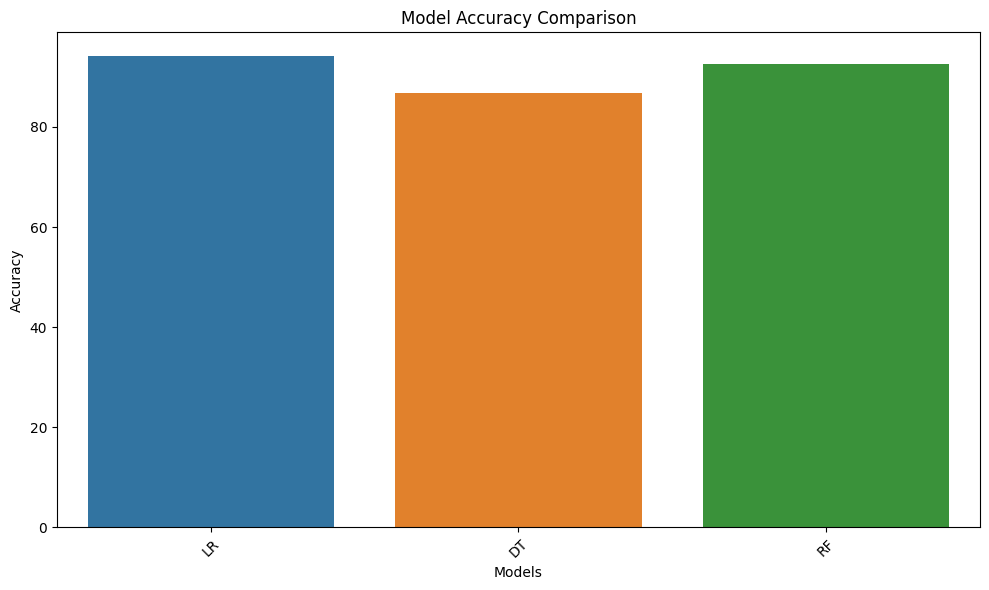

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'final_data' is your DataFrame
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
sns.barplot(x='Models', y='ACC', data=final_data)
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


In [78]:
#Oversampling

In [79]:
X = data.drop('Class',axis=1)
y = data['Class']

In [80]:
X.shape

(283726, 30)

In [81]:
y.shape

(283726,)

In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [84]:
y_res.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)


In [86]:
#Logistic Regression

In [87]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [88]:
y_pred1 = log.predict(X_test)

In [89]:
accuracy_score(y_test,y_pred1)

0.9718010273428536

In [90]:
precision_score(y_test,y_pred1)

0.9808705941410591

In [91]:
recall_score(y_test,y_pred1)

0.9625609176797622

In [92]:
f1_score(y_test,y_pred1)

0.971629505314473

In [93]:
#Decision Tree Classifier

In [94]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [95]:
y_pred2 = dt.predict(X_test)

In [96]:
accuracy_score(y_test,y_pred2)


0.9982965878801786

In [97]:
precision_score(y_test,y_pred2)

0.9977330240404892

In [98]:
recall_score(y_test,y_pred2)

0.9988740125617973

In [99]:
f1_score(y_test,y_pred2)

0.9983031922843603

In [100]:
#Random Forest Classifier

In [101]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [102]:
y_pred3 = rf.predict(X_test)


In [103]:
accuracy_score(y_test,y_pred3)

0.9999029143351397

In [104]:
precision_score(y_test,y_pred3)

0.999806508355321

In [105]:
recall_score(y_test,y_pred3)

1.0

In [106]:
f1_score(y_test,y_pred3)

0.9999032448170009

In [107]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})
final_data

,Models,ACC
0,LR,97.180103
1,DT,99.829659
2,RF,99.990291


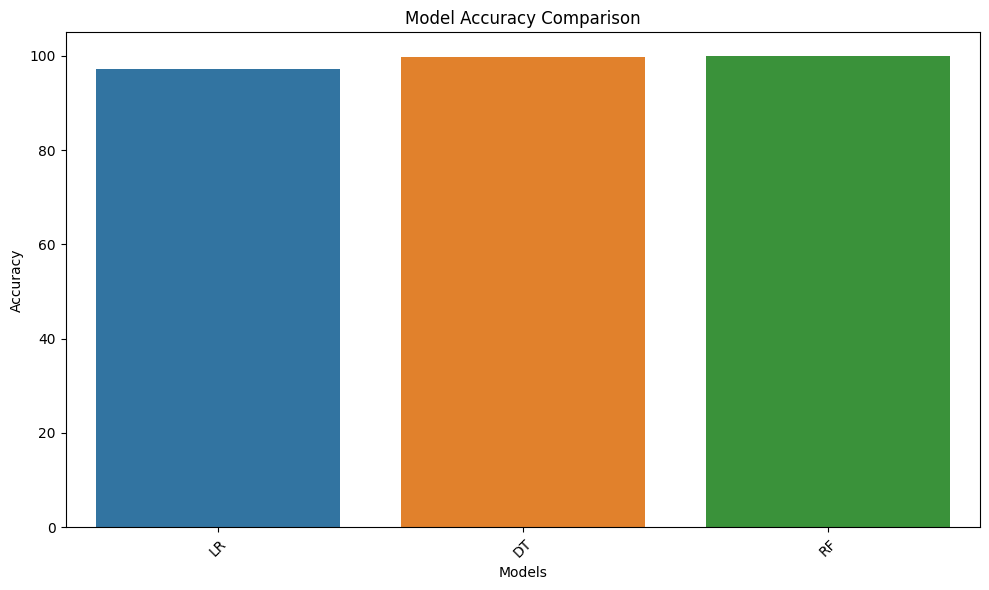

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'final_data' is your DataFrame
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
sns.barplot(x='Models', y='ACC', data=final_data)
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


In [109]:
# Save the Model

In [110]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [111]:
import joblib

In [112]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [113]:
model = joblib.load("credit_card_model")

In [114]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [115]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation


In [116]:
# Create a feature vector for prediction (replace the values with actual feature values)
feature_vector = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Convert the feature vector to a 2D array (required for prediction)
feature_vector_2d = [feature_vector]

# Predict the class (0: Non-Fraud, 1: Fraud)
prediction = model.predict(feature_vector_2d)

if prediction[0] == 0:
    result = "Non-Fraudulent"
else:
    result = "Fraudulent"

print("Transaction is:", result)


Transaction is: Non-Fraudulent


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [117]:
# Example feature vector for a potentially fraudulent transaction
fraudulent_feature_vector = [
    0.3,    # Feature 1
    1.5,    # Feature 2
    0.8,    # Feature 3
    0.2,    # Feature 4
    2.1,    # Feature 5
    1.6,    # Feature 6
    1.0,    # Feature 7
    0.7,    # Feature 8
    0.4,    # Feature 9
    0.9,    # Feature 10
    2.5,    # Feature 11
    1.2,    # Feature 12
    0.6,    # Feature 13
    0.8,    # Feature 14
    1.3,    # Feature 15
    1.1,    # Feature 16
    0.9,    # Feature 17
    0.5,    # Feature 18
    0.7,    # Feature 19
    1.4,    # Feature 20
    0.2,    # Feature 21
    0.8,    # Feature 22
    1.9,    # Feature 23
    0.3,    # Feature 24
    0.5,    # Feature 25
    0.8,    # Feature 26
    1.6,    # Feature 27
    0.9,    # Feature 28
    1.1,    # Feature 29
    0.7     # Feature 30
]

# Convert the feature vector to a 2D array (required for prediction)
fraudulent_feature_vector_2d = [fraudulent_feature_vector]

# Predict the class (0: Non-Fraud, 1: Fraud)
prediction = model.predict(fraudulent_feature_vector_2d)

if prediction[0] == 0:
    result = "Non-Fraudulent"
else:
    result = "Fraudulent"

print("Transaction is:", result)


Transaction is: Non-Fraudulent


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [118]:
# Example feature vector for a fraudulent transaction
fraudulent_feature_vector = [
    2.5,    # Feature 1
    3.1,    # Feature 2
    1.8,    # Feature 3
    2.9,    # Feature 4
    4.2,    # Feature 5
    2.6,    # Feature 6
    3.9,    # Feature 7
    2.7,    # Feature 8
    3.5,    # Feature 9
    4.0,    # Feature 10
    4.8,    # Feature 11
    2.3,    # Feature 12
    3.7,    # Feature 13
    3.1,    # Feature 14
    4.5,    # Feature 15
    3.9,    # Feature 16
    4.6,    # Feature 17
    3.8,    # Feature 18
    4.2,    # Feature 19
    3.6,    # Feature 20
    2.1,    # Feature 21
    3.4,    # Feature 22
    4.7,    # Feature 23
    3.0,    # Feature 24
    2.9,    # Feature 25
    2.3,    # Feature 26
    4.1,    # Feature 27
    3.6,    # Feature 28
    4.3,    # Feature 29
    2.8     # Feature 30
]

# Convert the feature vector to a 2D array (required for prediction)
fraudulent_feature_vector_2d = [fraudulent_feature_vector]

# Predict the class (0: Non-Fraud, 1: Fraud)
prediction = model.predict(fraudulent_feature_vector_2d)

if prediction[0] == 0:
    result = "Non-Fraudulent"
else:
    result = "Fraudulent"

print("Transaction is:", result)


Transaction is: Non-Fraudulent


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
